In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
resto = pd.read_excel('Data_Train.xlsx')

In [ ]:
resto.head()

In [ ]:
resto.isnull().sum()

In [ ]:
resto.info()

Observation

CITY,LOCALITY,VOTES,RATING has missing values

In [ ]:
resto["VOTES"] = resto['VOTES'].str.split(" ").str[0]
resto["VOTES"]= pd.to_numeric(resto["VOTES"])
resto["RATING"]=pd.to_numeric(resto["RATING"], errors='coerce')

Dropping word "votes" from the column votes and converting the column rating and votes into integer type

In [ ]:
resto.info()

Treatig missing value

In [ ]:
columns=["CITY","LOCALITY"]
for i in columns:
    resto[i].fillna(resto[i].mode()[0], inplace=True)
#All are object data type so replacing it with mode

Replacing continuous variables with median

In [ ]:
resto["VOTES"]=resto["VOTES"].fillna(resto["VOTES"].median())
resto["RATING"]=resto["RATING"].fillna(resto["RATING"].median())

                                                # Visualization

In [ ]:
resto["CITY"].value_counts()

In [ ]:
#calculating number of cuisines
l=resto['CUISINES'].str.count(',').add(1)

print("Maximum number of cuisines :",l.max(),"\n","Minimum number of cuisines:",l.min())


Replacing continuous variables with median

In [ ]:
resto['count'] = resto['CUISINES'].str.split(",").str.len()


In [ ]:
resto['Location']=resto['CITY']+' '+resto['LOCALITY']
resto.drop(columns=['CITY','LOCALITY'],inplace=True)

Using the below function to acquire city names

In [ ]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array


correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(resto.Location,correct_names)

print(len(names_array))
resto['Location']=names_array

In [ ]:
resto.head()

In [ ]:
plt.figure(figsize=(50,20))
plt.xlabel("Location", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="Location",y="COST",data=df)

Observation: Mumbai has the highest cost,followed by Gurgaon and least in Kochi

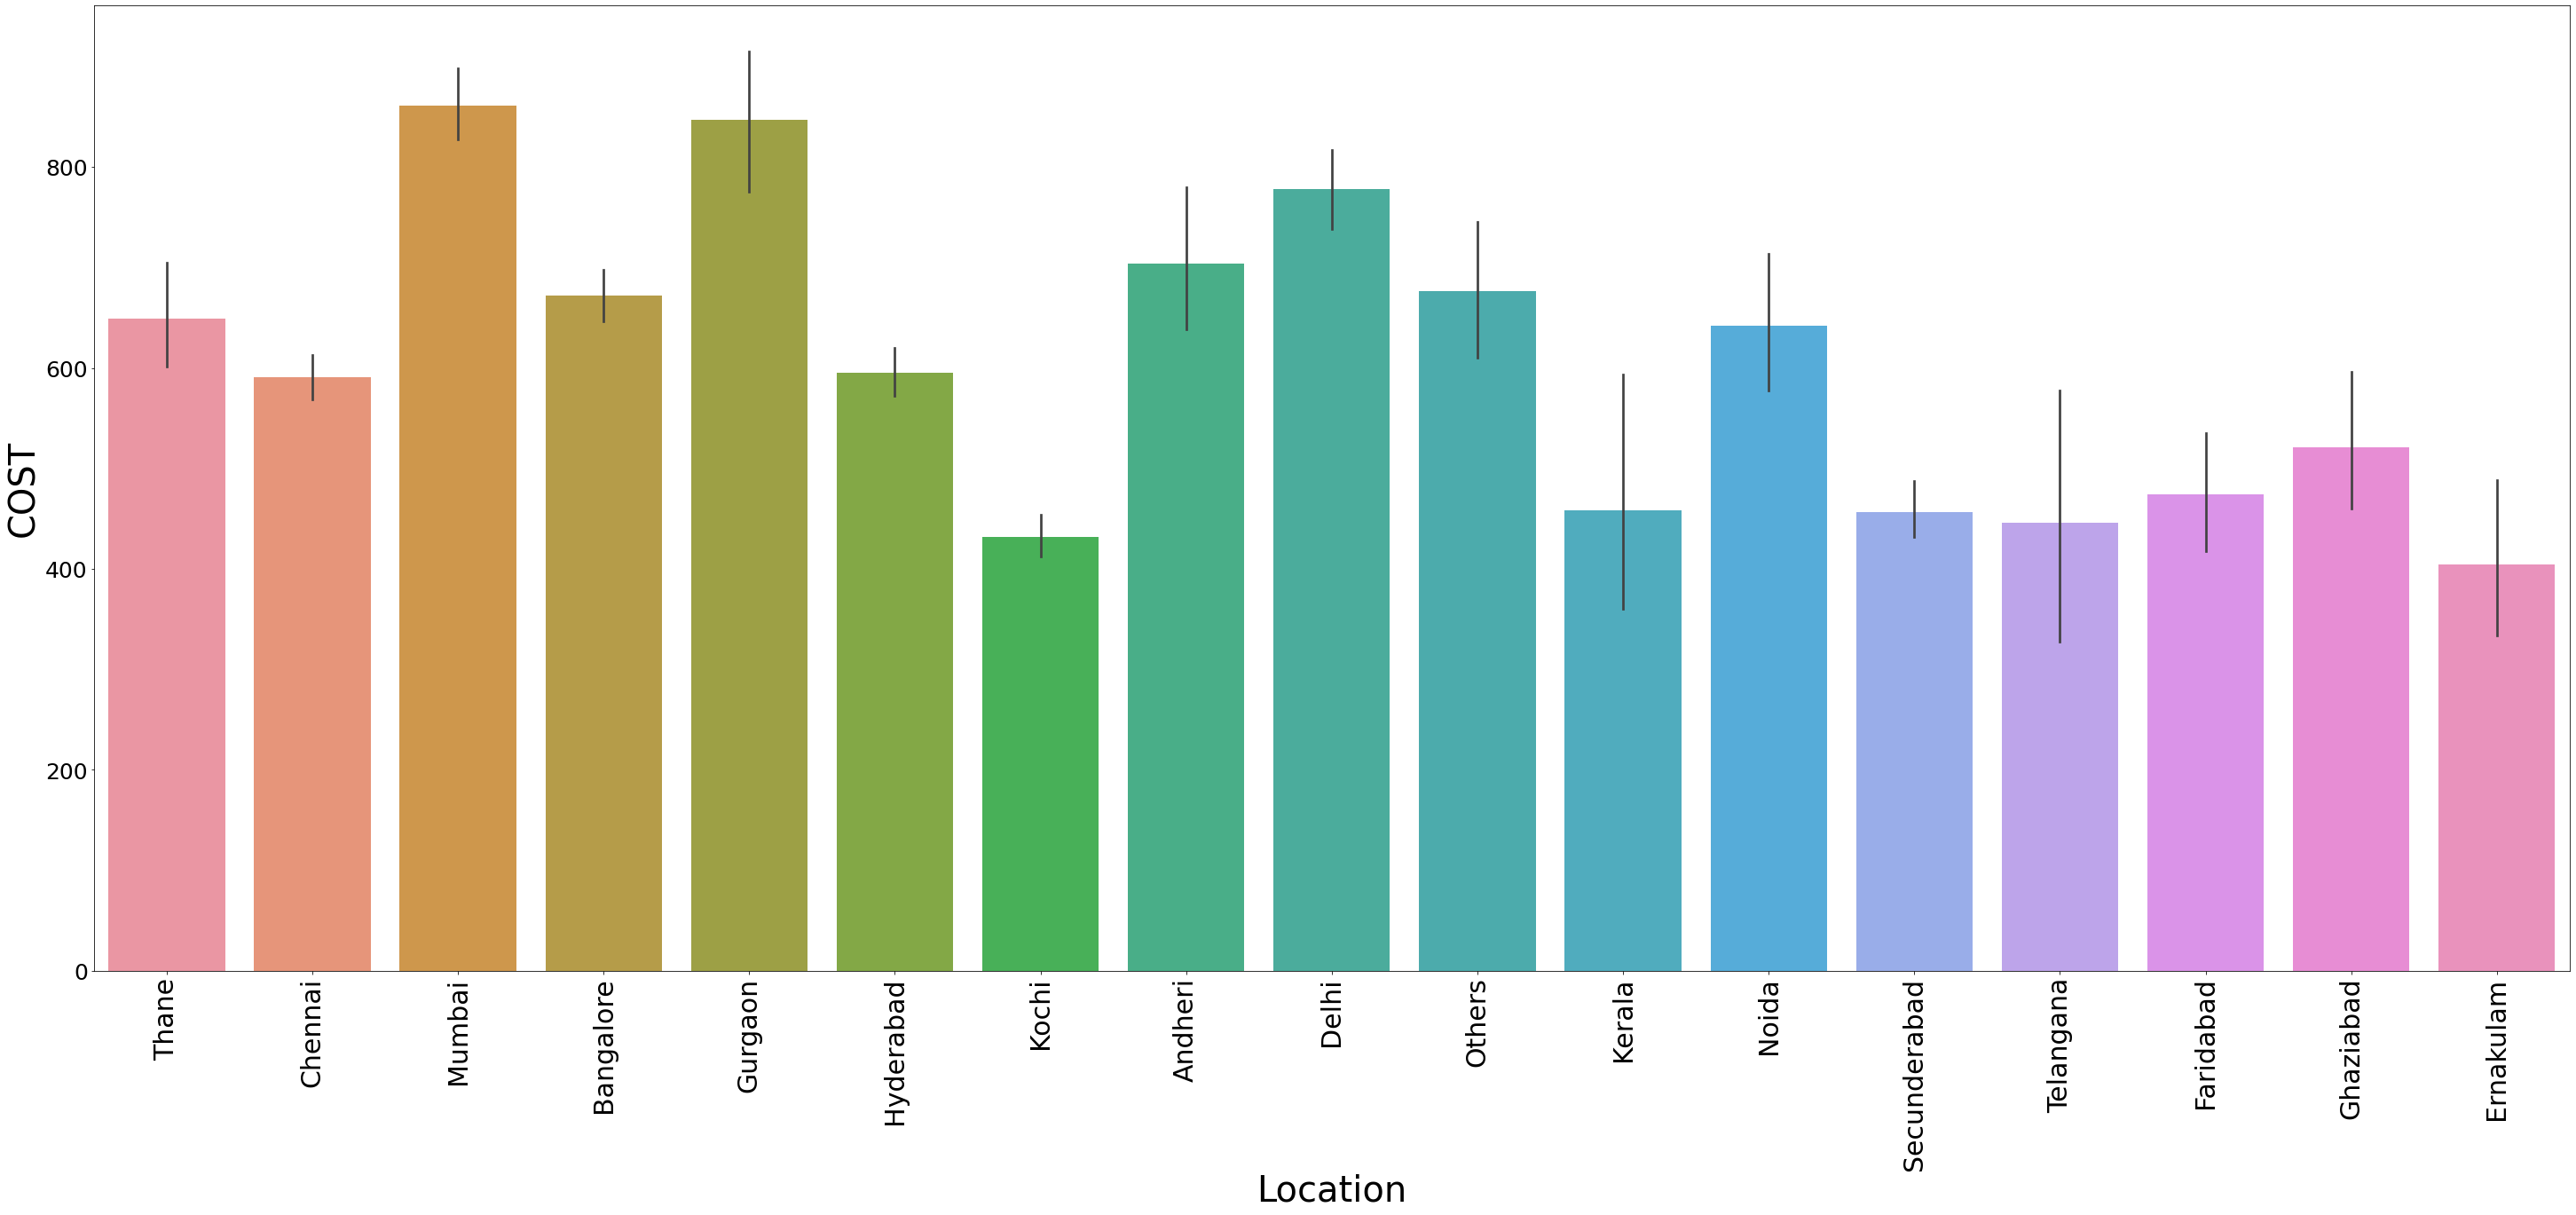

In [45]:
plt.figure(figsize=(50,20))
plt.xlabel("Location", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="Location",y="COST",data=resto)

Observation: Mumbai has the highest cost,followed by Gurgaon and least in Kochi

In [46]:
title_list=[]
for row in resto['TITLE']:
    title_list.append(list(row.split(',')))
resto['TITLE']=title_list

A paricular restaurant has more than one title so splitting it into different categories and creating another series with title name

In [47]:
df_title=resto['TITLE'].apply(lambda x: pd.Series(1, x))
df_title.replace(to_replace =np.NaN, 
                 value =0,inplace=True)

In [48]:
resto['count'] = resto['CUISINES'].str.split(",").str.len()
#finding number of cuisines in a restaurant

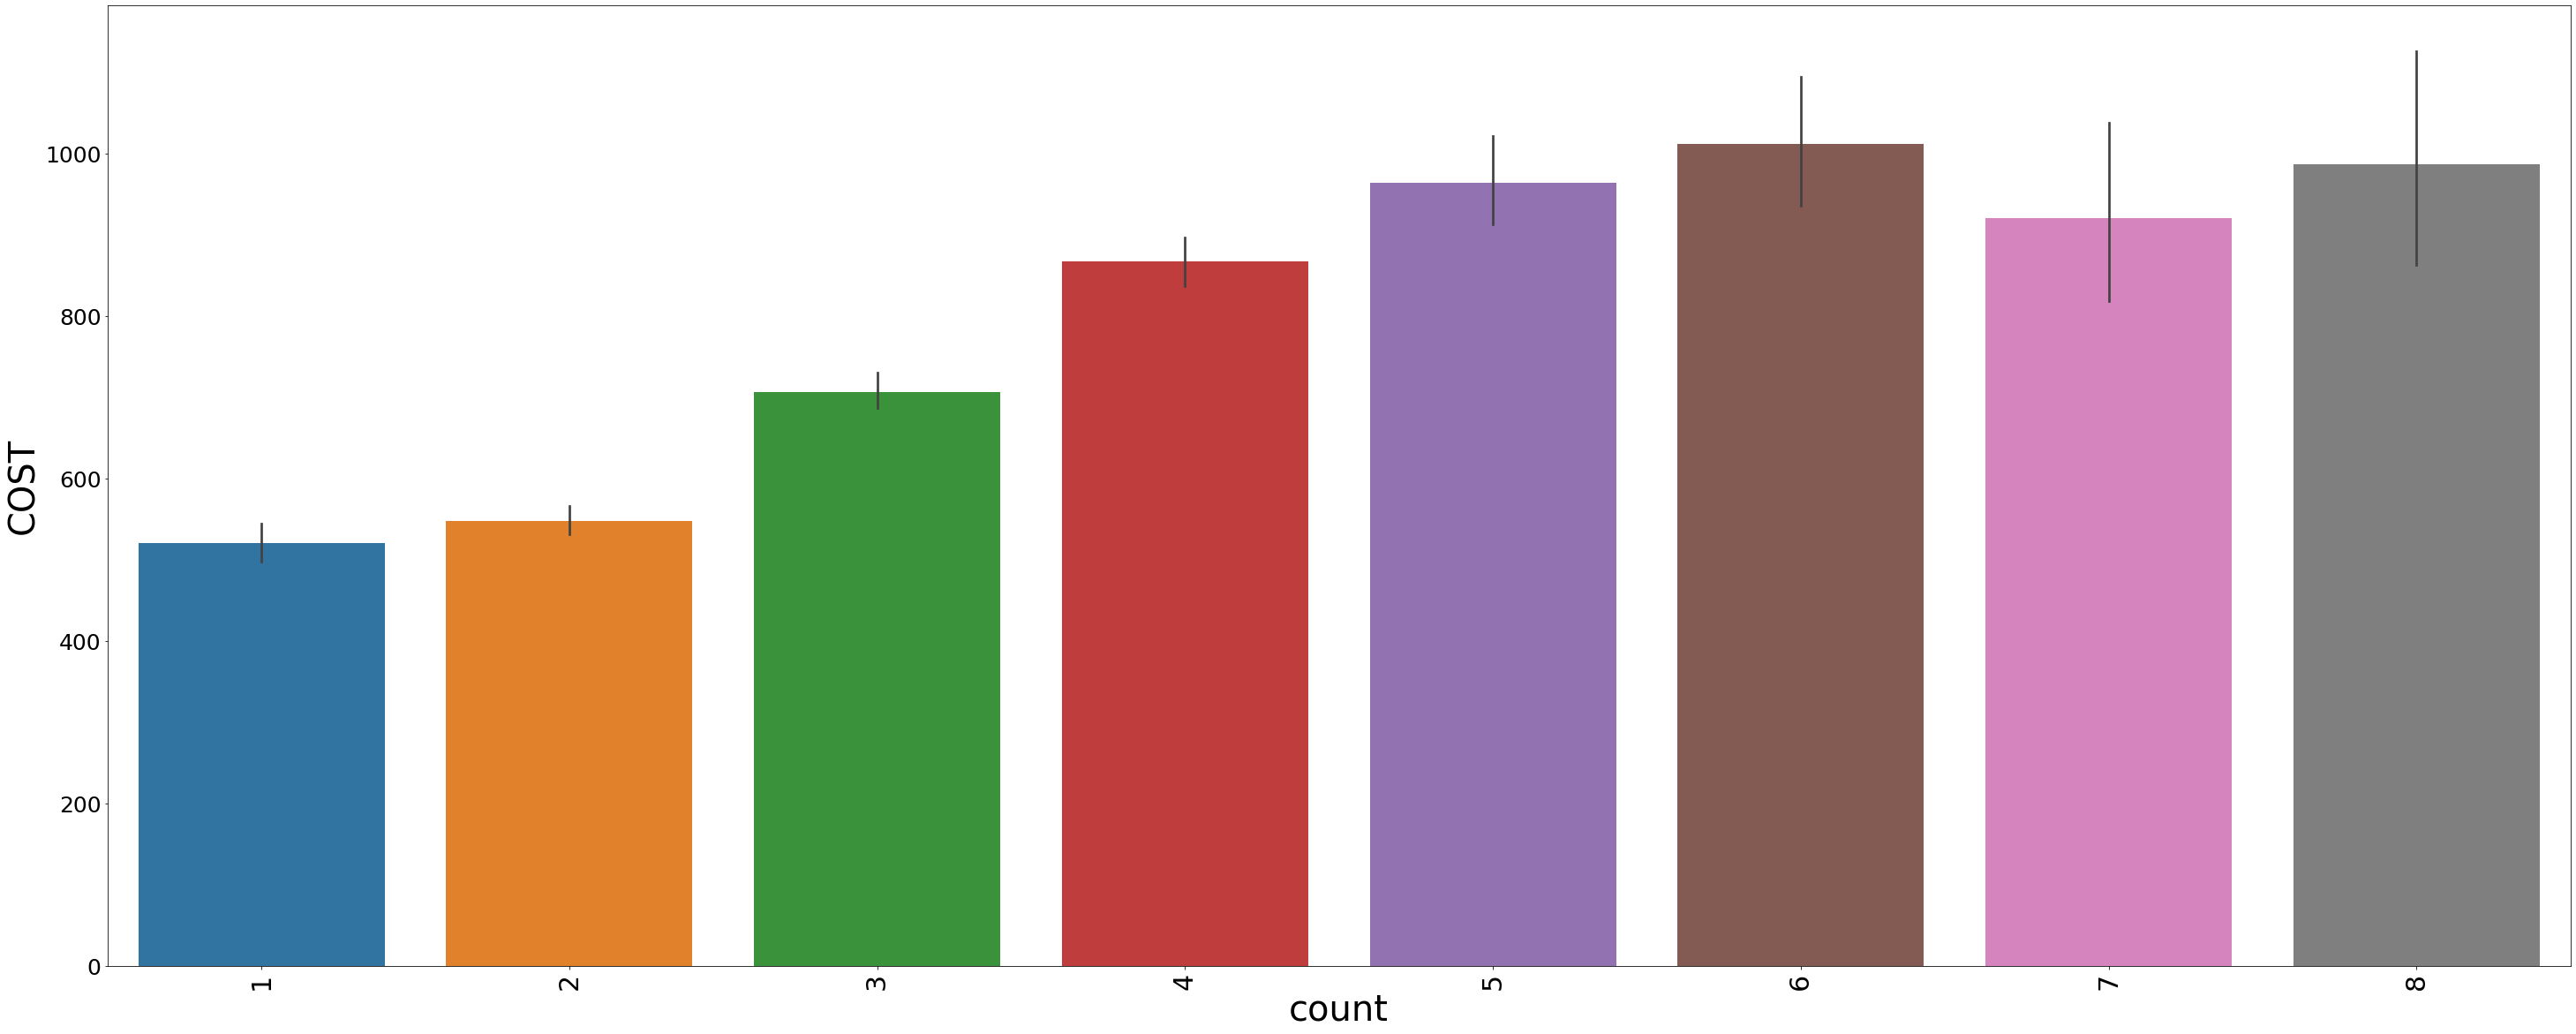

In [49]:
plt.figure(figsize=(50,20))
plt.xlabel("count", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="count",y="COST",data=resto)

Observation: Cuisine count with 6 has more cost than compared to others

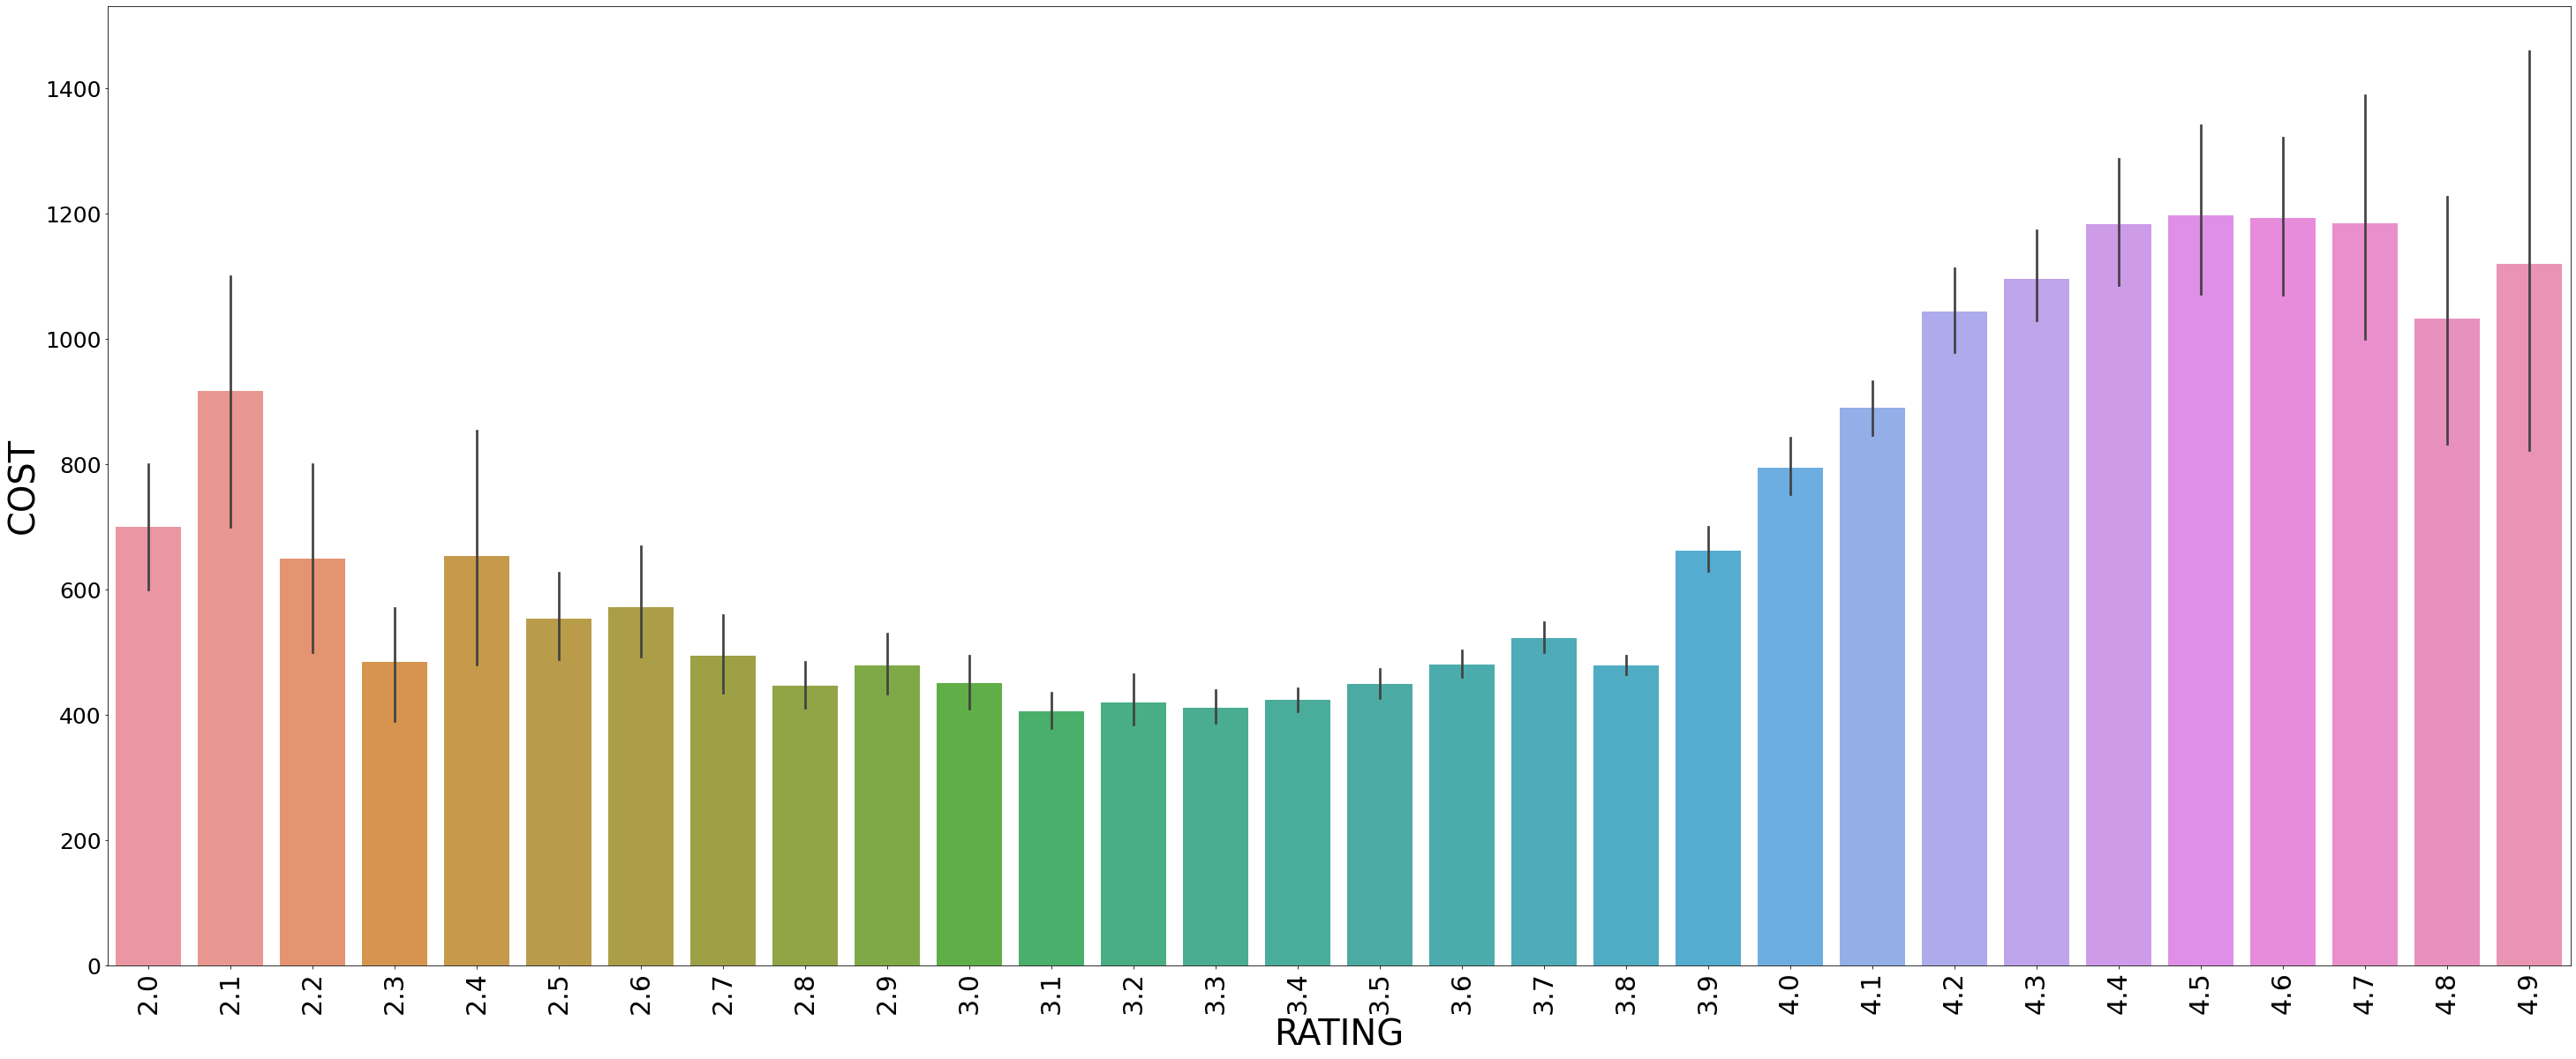

In [50]:
plt.figure(figsize=(50,20))
plt.xlabel("RATING", fontsize=40)
plt.ylabel("Cost", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="RATING",y="COST",data=resto)

Text(0, 0.5, 'cost')

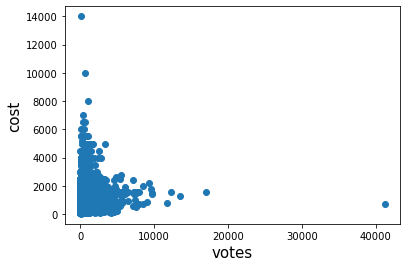

In [51]:
plt.scatter(x=resto["VOTES"],y=resto["COST"])
plt.xlabel("votes", fontsize=15)
plt.ylabel("cost", fontsize=15)

In [52]:
df_new = pd.concat([resto,df_title], axis=1)
df_new.drop(columns=["TITLE","CUISINES",'RESTAURANT_ID',"TIME"],axis=1,inplace=True)

In [53]:
df_new

,RATING,VOTES,COST,count,Location,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,3.6,49.0,1200,3,Thane,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.2,30.0,1500,3,Chennai,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.8,221.0,800,4,Chennai,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.1,24.0,800,2,Mumbai,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.8,165.0,300,1,Mumbai,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,3.8,546.0,500,3,Hyderabad,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12686,4.3,1214.0,1800,2,Mumbai,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12687,4.0,608.0,1300,4,Mumbai,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12688,3.5,32.0,400,4,Chennai,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_new["Location"] = labelencoder.fit_transform(df_new["Location"])


In [55]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new))
threshold=3
df_av =df_new[(z < 3).all(axis=1)]
#removing outliers
print(df_av.shape,"\n",df_new.shape)
#printing the shape after removing outliers

(7633, 29) 
 (12690, 29)


Observation after removing outliers , a lot of rows are dropped so we wont remove outliers and continue like this 

In [56]:
corr_matrix_price=df_new.corr()
corr_matrix_price["COST"].sort_values(ascending=False)

COST              1.000000
FINE DINING       0.612405
RATING            0.318653
BAR               0.315380
VOTES             0.251294
CASUAL DINING     0.242909
LOUNGE            0.228608
count             0.227976
PUB               0.142727
CLUB              0.123628
MICROBREWERY      0.121704
COCKTAIL BAR      0.065727
CAFÉ              0.022066
IRANI CAFE        0.018266
Location         -0.003353
MEAT SHOP        -0.004216
CONFECTIONERY    -0.009349
PAAN SHOP        -0.016949
DHABA            -0.025513
FOOD TRUCK       -0.030127
FOOD COURT       -0.034188
MESS             -0.041313
KIOSK            -0.047207
SWEET SHOP       -0.065009
BEVERAGE SHOP    -0.087889
BAKERY           -0.096356
None             -0.111998
DESSERT PARLOR   -0.116858
QUICK BITES      -0.369266
Name: COST, dtype: float64

In [57]:
x_p=df_new.drop("COST",axis=1)
y=df_new["COST"]

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_p)
x=sc.transform(x_p)
x=pd.DataFrame(x,columns=x_p.columns)
#scaling the columns of x_ap

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 42,test_size=0.20)


In [60]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


In [61]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.6650300931366357
ERROR:
 Mean absolute error: 206.84243402788357
Mean squared error: 115720.76092444744
r2 score : 0.6784640123302023


score of  DecisionTreeRegressor() is: 0.9916716847934107
ERROR:
 Mean absolute error: 256.16052939221015
Mean squared error: 244300.73076812163
r2 score : 0.32119806222786107


score of  KNeighborsRegressor() is: 0.777340787186902
ERROR:
 Mean absolute error: 199.74893617021277
Mean squared error: 114748.88302600473
r2 score : 0.6811644242310041


score of  SVR() is: 0.1956471746227989
ERROR:
 Mean absolute error: 270.7669824478087
Mean squared error: 281343.578867661
r2 score : 0.21827263506476136


score of  Lasso() is: 0.6649743038988217
ERROR:
 Mean absolute error: 206.69398725686517
Mean squared error: 115698.88203728081
r2 score : 0.6785248039248828


score of  Ridge() is: 0.665030085642532
ERROR:
 Mean absolute error: 206.8457801858734
Mean squared error: 115719.05276190511
r2 score : 0.6784687585462292


score

In [62]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print("Cross val score of :",m,cross_val_score(m,x,y,cv=5,scoring="r2").mean())



Cross val score of : LinearRegression() 0.6650459732487615
Cross val score of : DecisionTreeRegressor() 0.4052507274438167
Cross val score of : KNeighborsRegressor() 0.666787266709799
Cross val score of : SVR() 0.19709370028797757
Cross val score of : Lasso() 0.6650312447868245
Cross val score of : Ridge() 0.6650469564356433
Cross val score of : ElasticNet() 0.6168322756512283
Cross val score of : AdaBoostRegressor() -0.4180929254511305


In [ ]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'n_jobs':[-1]
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

In [ ]:
knn=KNeighborsRegressor(leaf_size= 2, n_jobs= -1, n_neighbors= 10, weights= 'uniform')
knn.fit(X_train,Y_train)
ypred_knn=knn.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred_knn))
print("Mean squared error:",mean_squared_error(Y_test,ypred_knn))
print("r2 score :",r2_score(Y_test,ypred_knn))
print("score of ",knn, "is:",knn.score(X_train,Y_train))
print("\n")

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
param={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}
cv=GridSearchCV(ridge,param)
cv.fit(x,y)
cv.best_params_

In [ ]:
model=Ridge(alpha=1,random_state=42)
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred))
print("Mean squared error:",mean_squared_error(Y_test,ypred))
print("r2 score :",r2_score(Y_test,ypred))
print("\n")

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
param={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}
cvl=GridSearchCV(lasso,param)
cvl.fit(x,y)
cvl.best_params_

In [ ]:
model=Lasso(alpha=1,random_state=42)
model.fit(X_train,Y_train)
ypredl=model.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,ypred_new))
print("Mean squared error:",mean_squared_error(Y_test,ypred_new))
print("r2 score :",r2_score(Y_test,ypred_new))
print("\n")

In [ ]:
KNN=KNeighborsRegressor()
adb=AdaBoostRegressor(base_estimator=KNN,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predab=adb.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,predab))
print("Mean squared error:",mean_squared_error(Y_test,predab))
print("r2 score :",r2_score(Y_test,predab))
print("score of ",adb, "is:",adb.score(X_train,Y_train))
print("Cross val score:",cross_val_score(adb,x,y,cv=5,scoring="r2").mean())

print("\n")


In [ ]:
l=Lasso()
adb=AdaBoostRegressor(base_estimator=l,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predab=adb.predict(X_test)
print(" Mean absolute error:", mean_absolute_error(Y_test,predab))
print("Mean squared error:",mean_squared_error(Y_test,predab))
print("r2 score :",r2_score(Y_test,predab))
print("score of ",adb, "is:",adb.score(X_train,Y_train))
print("Cross val score:",cross_val_score(adb,x,y,cv=5,scoring="r2").mean())

print("\n")


In [ ]:
plt.scatter(x=Y_test,y=ypred_knn)
plt.xlabel("Original value")

In [ ]:
df_cost=pd.DataFrame(ypred_new)
df_cost

In [ ]:
test = pd.read_excel('Data_Test.xlsx')

In [ ]:
test.head()

In [ ]:
test.isnull().sum()

In [ ]:
test["VOTES"] = test['VOTES'].str.split(" ").str[0]
test["VOTES"]= pd.to_numeric(test["VOTES"])
test["RATING"]=pd.to_numeric(test["RATING"], errors='coerce')

In [ ]:
columns=["CITY","LOCALITY"]
for i in columns:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [ ]:
test["VOTES"]=test["VOTES"].fillna(test["VOTES"].median())
test["RATING"]=test["RATING"].fillna(test["RATING"].median())

In [ ]:
test['Location']=test['CITY']+' '+test['LOCALITY']
test.drop(columns=['CITY','LOCALITY'],inplace=True)

In [ ]:
from fuzzywuzzy import process
 
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array


correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad' ]
name_match=match_names(test.Location,correct_names)

print(len(names_array))
test['Location']=names_array

In [ ]:
title_list=[]
for row in test['TITLE']:
    title_list.append(list(row.split(',')))
test['TITLE']=title_list

In [ ]:
test_title=test['TITLE'].apply(lambda x: pd.Series(1, x))
test_title.replace(to_replace =np.NaN, 
                 value =0,inplace=True)

In [ ]:
test['count'] = test['CUISINES'].str.split(",").str.len()


In [ ]:
test_new = pd.concat([test,test_title], axis=1)
test_new.drop(columns=["TITLE","CUISINES","TIME","RESTAURANT_ID"],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test_new["Location"] = labelencoder.fit_transform(test_new["Location"])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test_new)
X=sc.transform(test_new)
X=pd.DataFrame(X,columns=test_new.columns)

In [ ]:
X_train.shape

In [ ]:
test_new.head()

In [ ]:
df_new.columns

In [ ]:
test_new.columns

In [ ]:
test_new.drop("BHOJANALYA",axis=1,inplace=True)

In [ ]:
df_new.head()

In [ ]:
adb=AdaBoostRegressor(base_estimator=KNN,n_estimators=6,learning_rate=1,random_state=42)
adb.fit(X_train,Y_train)
predtest=adb.predict(X)    

In [ ]:
predtest

In [ ]:
df_output=pd.DataFrame(predtest)
df_output.to_csv("restaurant_cost.csv")

In [ ]:
import joblib
joblib.dump(knn,"restaurant_cost.pkl")